In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import geopandas as gpd
from rasterio.plot import show
import rioxarray as riox
from rasterio.enums import Resampling
import folium
import geopandas as gpd
from scipy.special import expit
from rasterio.plot import show_hist
import rioxarray as riox
from rasterio.mask import mask
from rasterio.enums import Resampling
import earthpy.plot as ep
from rasterio.plot import show_hist

In [2]:
def aggregate_rasters(input_files, output_file):
    # Read the data from the input files
    data = [rasterio.open(file).read(1) for file in input_files]

    # Calculate the median
    median = np.median(data, axis=0)

    # Get the metadata from the first input file
    with rasterio.open(input_files[0]) as src:
        meta = src.meta

    # Update the metadata to reflect the number of layers in the output file
    meta.update(count=1)

    # Write the median to the output file
    with rasterio.open(output_file, 'w', **meta) as dst:
        dst.write(median, 1)

In [3]:
input_files = ['final_CEP_austria.tiff', 'final_Coastal_flood_austria.tiff', 'final_Drought_austria.tiff','final_output_ETAnomaly_Austria.tiff','final_Riverine_flood_austria.tiff','final_Seasonal_Variability_austria.tiff','final_Water_stress_austria.tiff']
data = [rasterio.open(file).read(1) for file in input_files]
for d in data:
    print(d.shape)


(362, 1046)
(362, 1046)
(362, 1046)
(362, 1047)
(362, 1046)
(362, 1046)
(362, 1046)


In [ ]:
src = rasterio.open('final_output_scaled_cropland.tiff')
tkn = rasterio.open('final_output_scaled_Soil.tiff')
lsd = rasterio.open('final_output_scaled.tiff')
print(src.res)
print(tkn.res)
print(lsd.res)

In [4]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

def resample_raster(input_file, reference_file, output_file):
    # Open the input and reference files
    with rasterio.open(input_file) as src, rasterio.open(reference_file) as ref:
        # Calculate the transform and dimensions for the new raster
        transform, width, height = calculate_default_transform(
            src.crs, ref.crs, ref.width, ref.height, *ref.bounds)

        # Update the metadata for the new raster
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': ref.crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        # Create the new raster
        with rasterio.open(output_file, 'w', **kwargs) as dst:
            # Reproject and resample the input raster to match the reference raster
            reproject(
                source=rasterio.band(src, 1),
                destination=rasterio.band(dst, 1),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=ref.crs,
                resampling=Resampling.bilinear)


In [5]:
resample_raster('final_output_ETAnomaly_Austria.tiff', 'final_Coastal_flood_austria.tiff', 'resampled_ET.tiff')

In [6]:
input_files = ['final_CEP_austria.tiff', 'final_Coastal_flood_austria.tiff', 'final_Drought_austria.tiff','resampled_ET.tiff','final_Riverine_flood_austria.tiff','final_Seasonal_Variability_austria.tiff','final_Water_stress_austria.tiff']
output_file = 'Water_related_Factors.tiff'
aggregate_rasters(input_files, output_file)

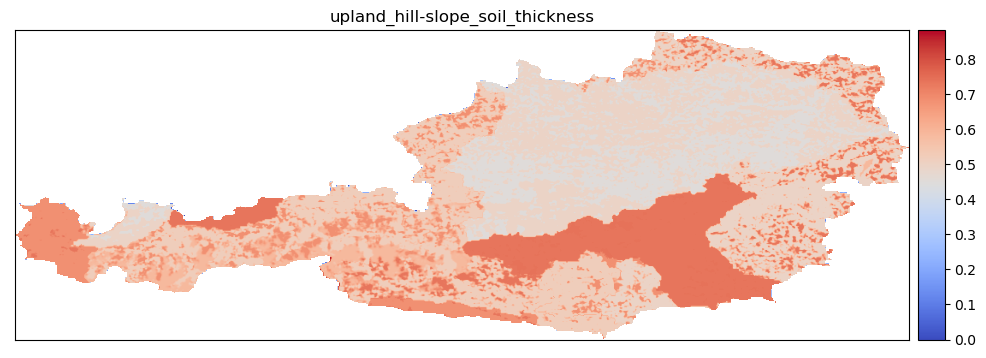

(0.0072944550669216054, 0.007292817679558019)


In [7]:
with rasterio.open('Water_related_Factors.tiff') as tkn:
    img = tkn.read(1)
    img_meta = tkn.meta
    tkn
ep.plot_bands(img,cmap='coolwarm',title="upland_hill-slope_soil_thickness")
print(tkn.res)

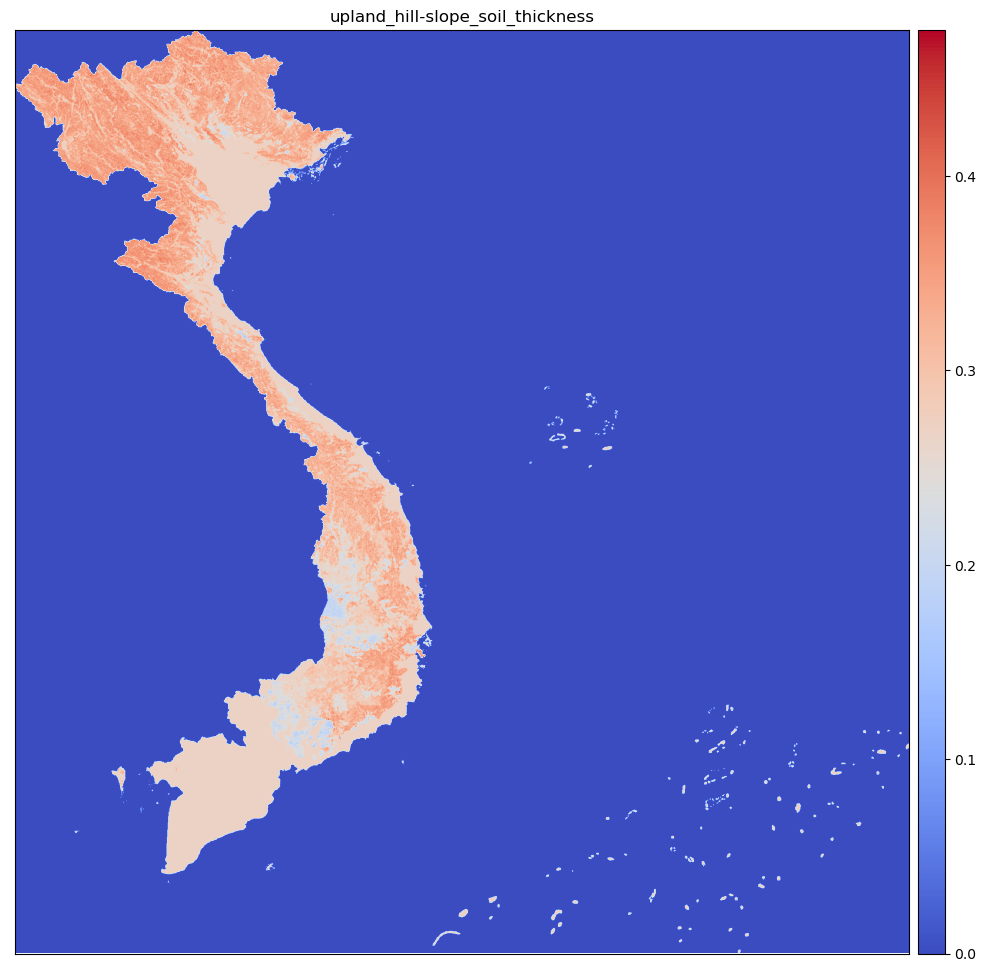

(0.007287968139230062, 0.007287968139230062)


In [23]:
with rasterio.open('resampled_Soil.tiff') as tkn:
    img = tkn.read(1)
    img_meta = tkn.meta
    tkn
ep.plot_bands(img,cmap='coolwarm',title="upland_hill-slope_soil_thickness")
print(tkn.res)

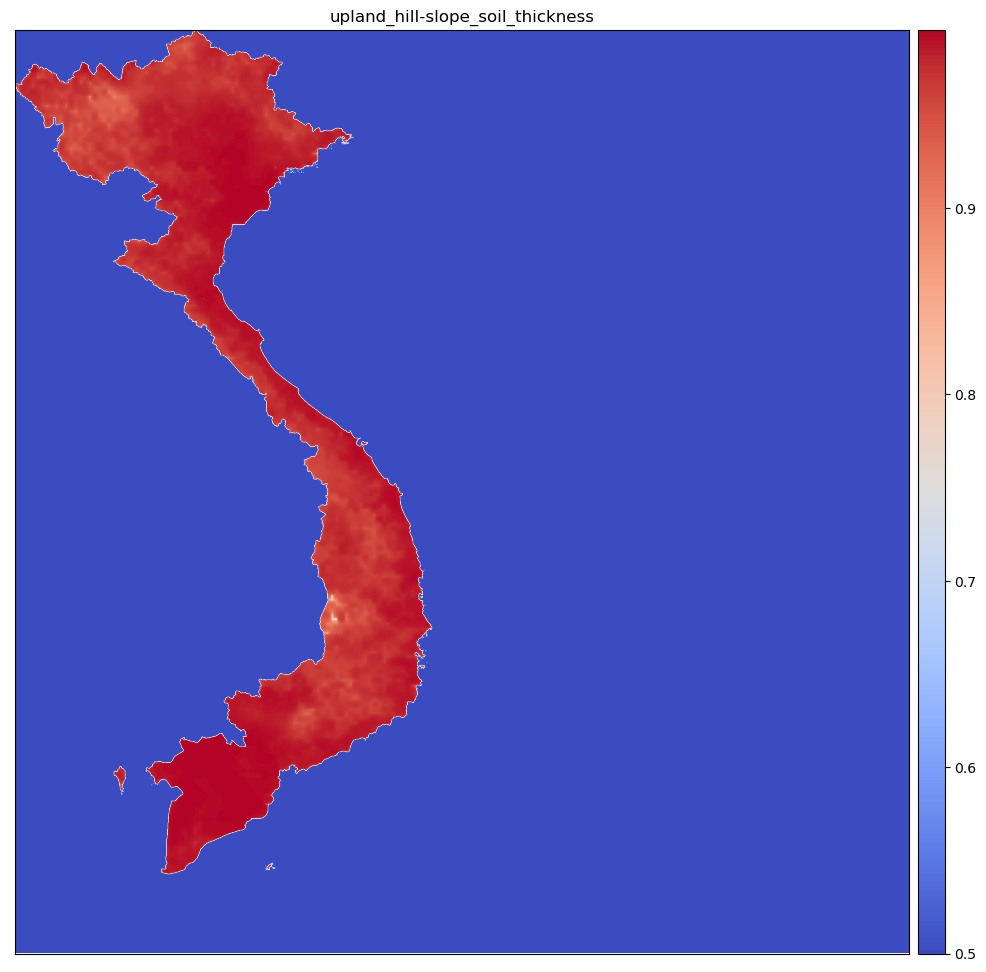

(0.007287891977245582, 0.0072880395173694126)


In [24]:
with rasterio.open('final_output_scaled.tiff') as tkn:
    img = tkn.read(1)
    img_meta = tkn.meta
    tkn
ep.plot_bands(img,cmap='coolwarm',title="upland_hill-slope_soil_thickness")
print(tkn.res)

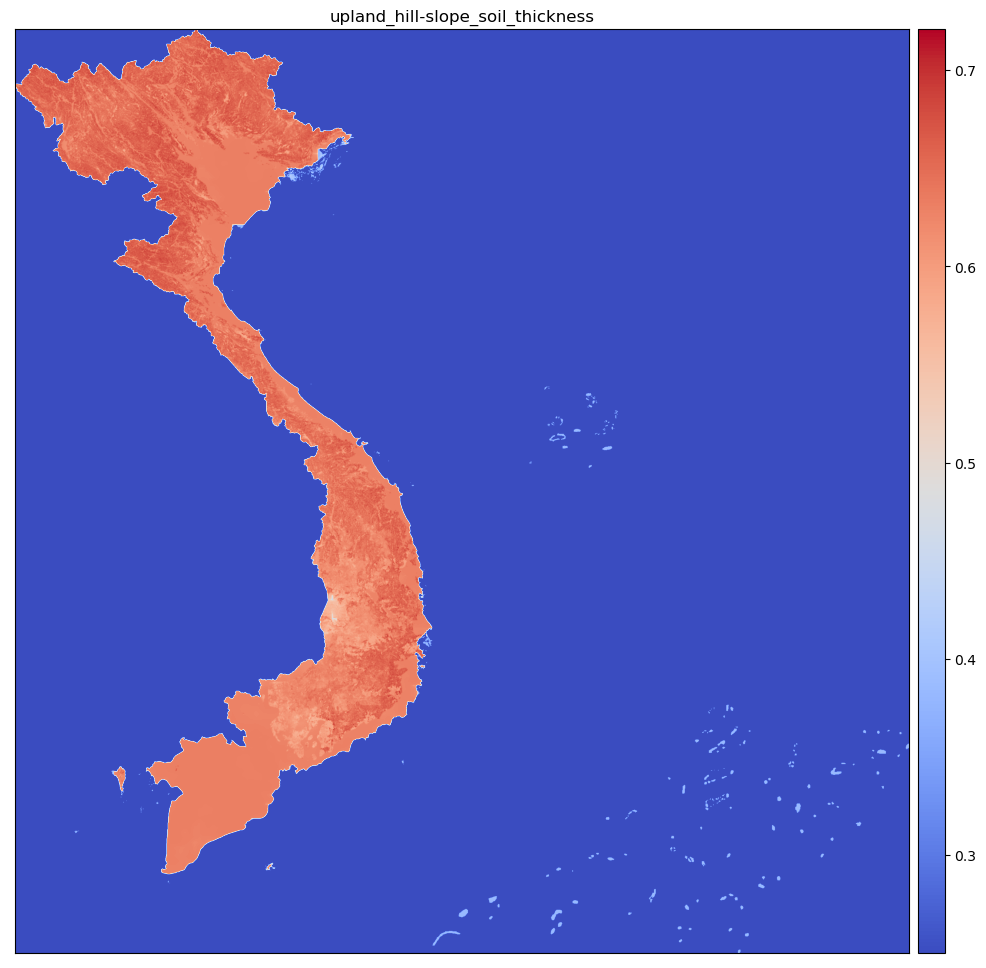

(0.007287968139230062, 0.007287968139230062)


In [27]:
with rasterio.open('Land Use and Agriculture.tiff') as tkn:
    img = tkn.read(1)
    img_meta = tkn.meta
    tkn
ep.plot_bands(img,cmap='coolwarm',title="upland_hill-slope_soil_thickness")
print(tkn.res)